In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from tqdm import tqdm
import pandas as pd
import sys
from matplotlib.ticker import LogLocator, NullFormatter
import os
import plot_settings
h="#404040"
to_rgb = lambda h: tuple(int(h[i:i+2], 16) / 255 for i in (1, 3, 5))
to_rgb(h)

(0.25098039215686274, 0.25098039215686274, 0.25098039215686274)

Index(['size', 'epoch', 'w1_ideal_target', 'w1_ideal_concurrent',
       'w1_concurrent_target', 'error', 'diff'],
      dtype='object')


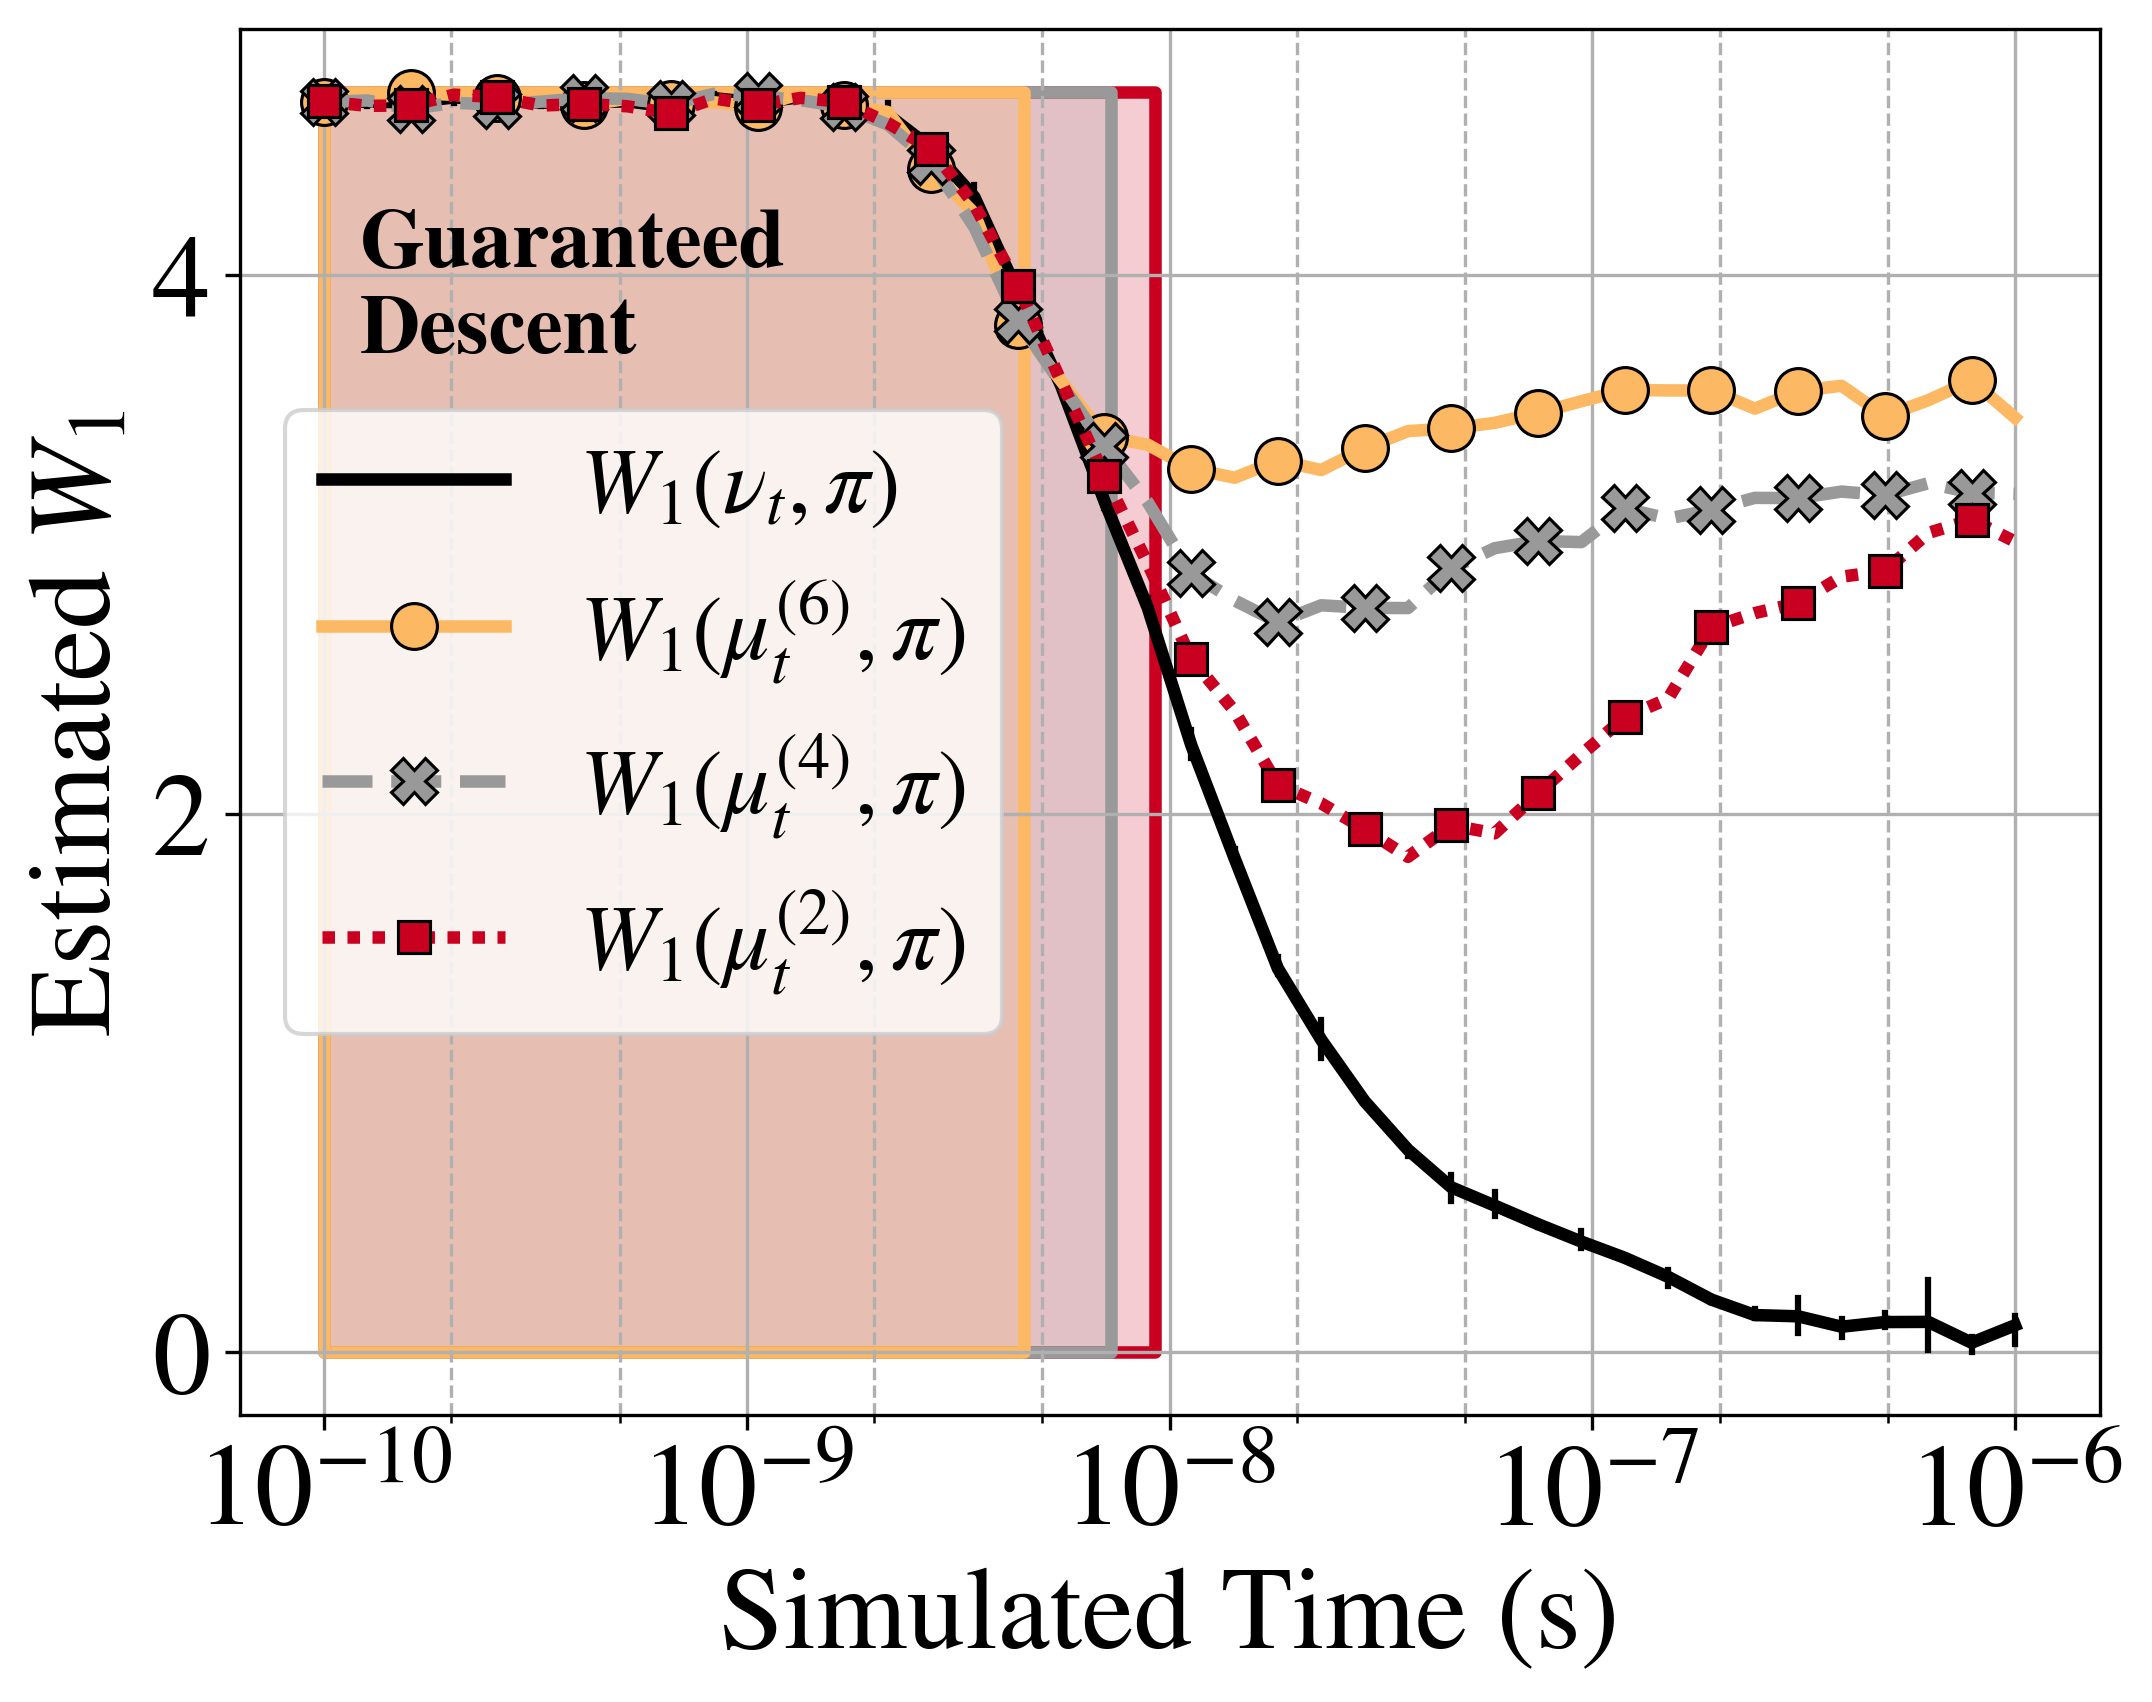

In [14]:
df = pd.read_csv('../data/wasserstein_longer.csv')
eigmax = 4
print(df.columns)
df['Blocks'] = 12 // df['size']
df = df.loc[df['Blocks'] != 3]
df['smoothness'] = 4 * 1 / (310e3 * 50e-15)
df['wasserstein_init'] = 4.68
df['contraction'] = df['w1_ideal_target'] / df['wasserstein_init']
df['wasserstein_upper_bound'] =   (df['diff'] + df['error'])
df['wasserstein_upper_loose'] =   df['error'] / np.maximum(1-df['epoch']*df['smoothness'], 0)
df['wasserstein_upper_bound_target'] =   df['wasserstein_upper_bound'] + df['w1_ideal_target'] #+ df['w1_ideal_target']
df['wasserstein_upper_loose_target'] =   df['wasserstein_upper_loose'] + df['w1_ideal_target'] #+ df['w1_ideal_target']
df['gap'] = (1 + df['contraction']) * df['wasserstein_init'] - df['w1_ideal_concurrent']
df['est_gap'] = df['diff'] + df['error'] - df['w1_ideal_concurrent']
df['bound_gap'] = df['wasserstein_upper_loose'] - df['wasserstein_upper_bound']
df['label'] = '$W_1(\\mu^{('+df['Blocks'].astype(str) + ')}_t, \\pi)$'

palette = [ 
            # "#404040",
            "#fdb863",
            "#999999",
            "#ca0020",
            
            ]
to_rgb = lambda h: tuple(int(h[i:i+2], 16) / 255 for i in (1, 3, 5))
palette = list(map(to_rgb, palette))
fig, ax = plt.subplots(figsize = (8, 6))
ax.fill_betweenx(x1=1e-10, x2=9.236708571873846e-09, y=[0, 4.68], linewidth=3, color=[*palette[2], 0.2], edgecolor=[*palette[2], 1])
ax.fill_betweenx(x1=1e-10, x2=7.278953843983161e-09, y=[0, 4.68], linewidth=3, color=[*palette[1], 0.2], edgecolor=[*palette[1], 1])
ax.fill_betweenx(x1=1e-10, x2=4.520353656360241e-09, y=[0, 4.68], linewidth=3, color=[*palette[0], 0.2], edgecolor=[*palette[0], 1])

sns.lineplot(ax=ax, data=df.query('Blocks != 3'), x='epoch', y='w1_ideal_target', label='$W_1(\\nu_t, \\pi)$',
             linewidth=3,
             markersize=10,
             color='k',
             err_style='bars',
             markeredgecolor='k')
sns.lineplot(ax=ax,data=df.query('Blocks != 3'), 
             x='epoch', 
             y='w1_concurrent_target', 
             hue='label', 
             palette=palette, 
             markers=True, 
             markevery=2, 
             
             style='label',
             linewidth=3,
             markersize=11,
             err_style='bars',
             err_kws={'capthick': 16},
             markeredgecolor='k')
# sns.lineplot(ax=ax,data=df, x='epoch', y='wasserstein_upper_bound', hue='Blocks', palette=palette[1:5])
# ax.set_xticks()
ax.xaxis.set_minor_formatter(NullFormatter())
ax.grid(which='major')
ax.grid(which='minor', linestyle='--')
# ax.grid(which='minor', axis='x')
# ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10, numticks=100, subs=[1]))
ax.xaxis.set_minor_locator(LogLocator(base=10, numticks=100,subs=[0.2, 0.5]))
# ax.axhline(4.69)
# 2 9.236708571873846e-09
# 3 7.278953843983161e-09
# 4 7.278953843983161e-09
# 6 4.520353656360241e-09
ax.legend(fontsize=22)
ax.set_ylabel('Estimated $W_1$')
# ax.set_axis_off()
# ax.add_patch(plt.arrow(x=0.64, y=0.4, dx=-.1, dy=.0,length_includes_head=False, width=.01, transform=ax.transAxes, facecolor=palette[3], edgecolor='k'))
# ax.add_patch(plt.arrow(x=0.61, y=0.54, dx=-.1, dy=.0,length_includes_head=False, width=.01, transform=ax.transAxes, facecolor=palette[2], edgecolor='k'))
# ax.add_patch(plt.arrow(x=0.545, y=0.68, dx=-.1, dy=.0,length_includes_head=False, width=.01, transform=ax.transAxes, facecolor=palette[1], edgecolor='k'))
# ax.set_axis_on()
ax.annotate(text='Guaranteed\nDescent', xy=(0.15, 0.75),xycoords='figure fraction', fontsize=20, weight='bold')
ax.set_xlabel("Simulated Time (s)")
plt.show()
fig.savefig('../figures/wasserstein_convergence.pdf', bbox_inches='tight')

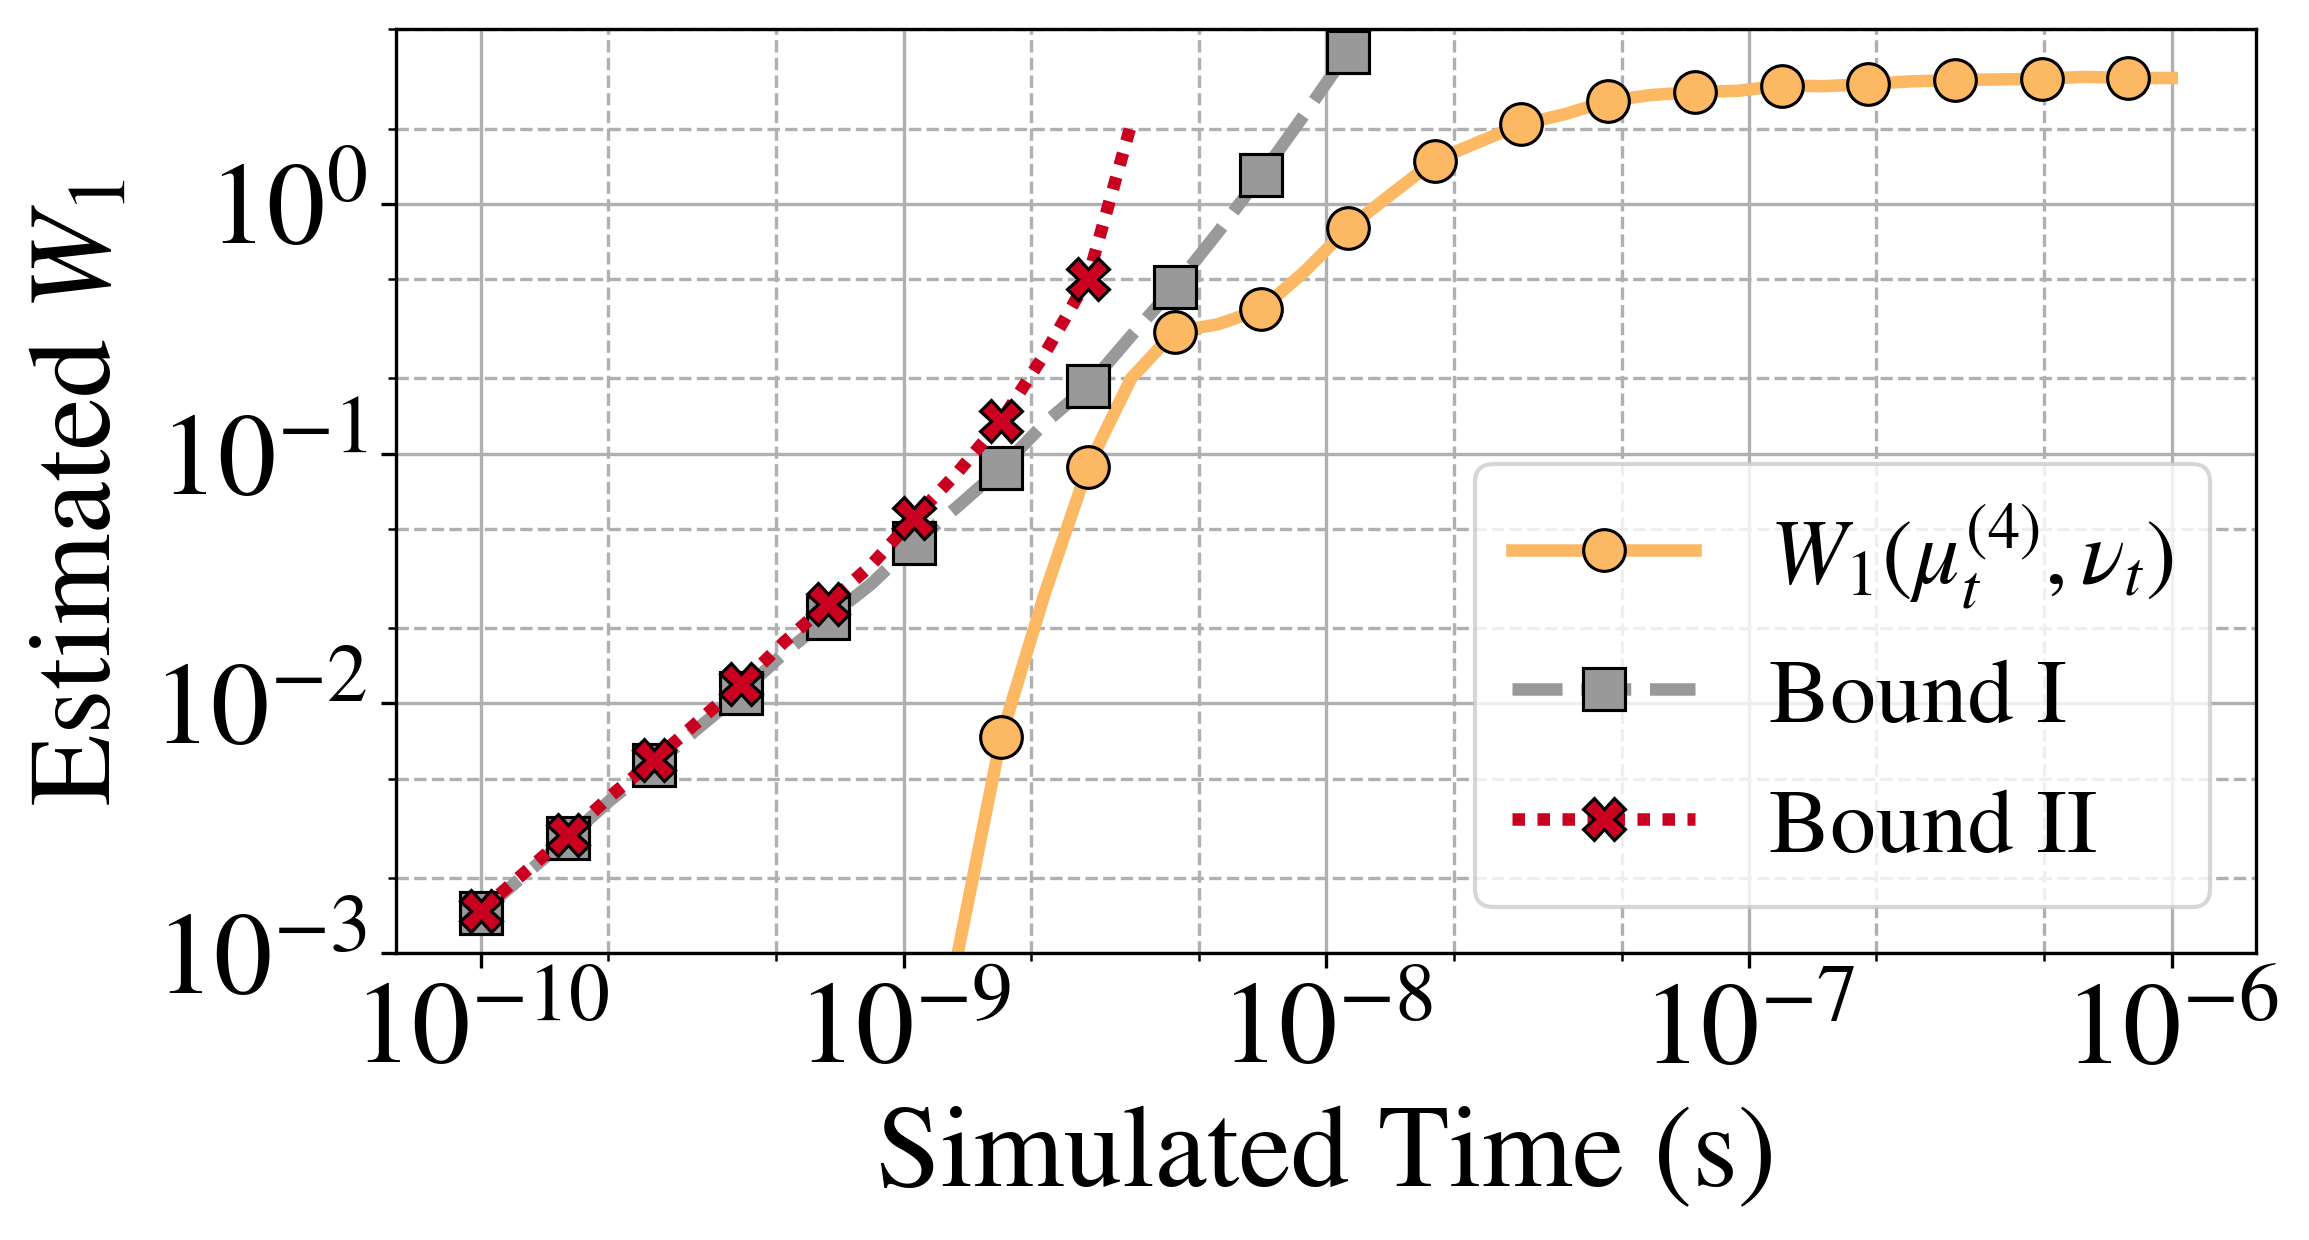

In [15]:
fig, axs = plt.subplots(figsize = (8, 4), ncols=1)
# ax.set_
axs = [axs]
offset = 0.2
width=0.2
yrel = df.query('Blocks == 4')['w1_ideal_concurrent']

pltdf = df.rename(columns=dict(wasserstein_upper_bound="Bound I", wasserstein_upper_loose="Bound II", w1_ideal_concurrent="$W_1(\\mu_t^{(4)}, \\nu_t)$")
                  ).melt(value_vars=["$W_1(\\mu_t^{(4)}, \\nu_t)$", 'Bound I', 'Bound II'], id_vars=['Blocks', 'epoch'], var_name='Value', value_name='W1')
ax=axs[0]
sns.lineplot(ax=ax, 
             data=pltdf.query('Blocks == 4'), 
             x='epoch', 
             y='W1', 
             hue='Value', 
             style='Value',
               markers=['o', 's', 'X'], 
               markersize=10,
               markevery=2,
               linewidth=3, 
               palette=palette,markeredgecolor='black', )
ax.grid()
ax.grid(which='minor', linestyle='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-3, 5)
ax.legend(fontsize=22)
# ax=axs[1]
# sns.lineplot(ax=ax, data=pltdf.query('Blocks == 4'), x='epoch', y='W1', hue='Value', style='Value', markers=['o', 's', 'X'], linewidth=2, palette=palette,markeredgecolor='black', )
# ax.grid()
# ax.grid(which='minor', linestyle='--')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim(1e-3, 5)
# ax.legend(fontsize=18)
# ax.set_yticks([])
# ax.set_yticklabels([])
ax.xaxis.set_major_locator(LogLocator( base=10, numticks=100, subs=[1] ) )
ax.xaxis.set_minor_locator(LogLocator( base=10, numticks=100,subs=[0.2, 0.5, 1] ))
ax.yaxis.set_major_locator(LogLocator( base=10, numticks=100, subs=[1] ) )
ax.yaxis.set_minor_locator(LogLocator( base=10, numticks=100,subs=[0.2, 0.5, 1] ))
ax.set_ylabel('Estimated $W_1$')
ax.set_xlabel("Simulated Time (s)")
fig.savefig('../figures/wasserstein_upper_bound.pdf', bbox_inches='tight')